In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import math
from matplotlib.colors import ListedColormap
import random
from IPython.display import display, clear_output
import time

# Problem 1

In [16]:
#defining cellular automona rules for rule 122

neighrule = {(0,0,0):0, (0,0,1):1, (0,1,0):0, (0,1,1):1, (1,0,0):1, (1,0,1):1, (1,1,0):1, (1,1,1):0}

In [17]:
#setup parameters to run cellular autonoma
initialcond = [1,0,0,0,0,0,0,0,1,1] # for testing
L = 8 #how long is the system?


In [18]:
# Takes a configuration and returns the corresponding integer
def config2int(config):
    return int(''.join(map(str, config)),2) # maps the config->strings, joins them, and then converts to int from binary

# Takes an integer and converts it to a configuration (list of cell states)
def int2config(x):
    return [1 if x & 2**i > 0 else 0 for i in range(L - 1, -1, -1)]

def update(config):
    nextconfig = [0]*L
    for x in range(L):
        nextconfig[x] = neighrule[(config[(x - 1) % L],config[x],config[(x + 1) % L])]
    return nextconfig

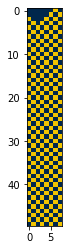

In [19]:
# Run the model for a few steps and plot
steps = 50
output = np.zeros([steps,L])
output[0,:] = int2config(2)
for i in range(1,steps):
    output[i,:] = update(output[i-1,:])
plt.cla()
cmap = ListedColormap([(0,39/255,76/255), (241/255,196/255,0)]) # for fun use maize & blue colors
plt.imshow(output, cmap = cmap)

Text(0.5, 1.0, 'Phase Space for Rule 122 for L=8')

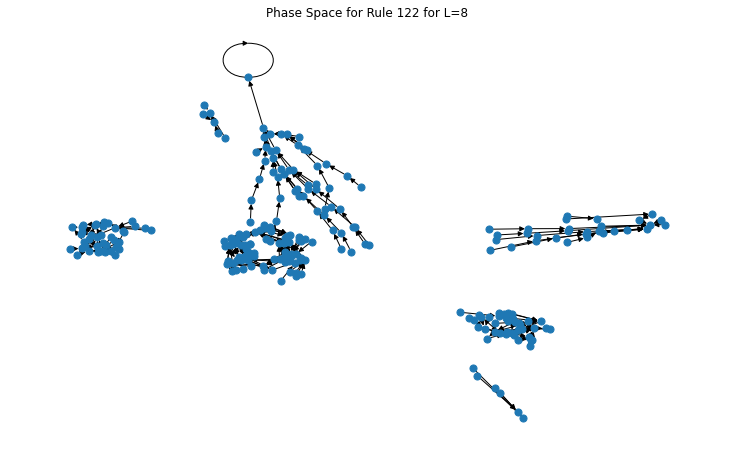

In [20]:
state_map = {}
for x in range(256):
    config = int2config(x)
    next_config = update(config)
    state_map[x] = config2int(next_config)

# showing the entire phase space configuration
G = nx.DiGraph()
for state, next_state in state_map.items():
    G.add_edge(state, next_state)

attractors = list(nx.simple_cycles(G))

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=50, with_labels=False, arrows=True)
plt.title(f"Phase Space for Rule 122 for L={L}")

In [21]:
g = nx.DiGraph() # Make an empty graph that will be the phase space

for x in range(2**L):
    g.add_edge(x, config2int(update(int2config(x))))
    
print(g)

DiGraph with 256 nodes and 256 edges


8


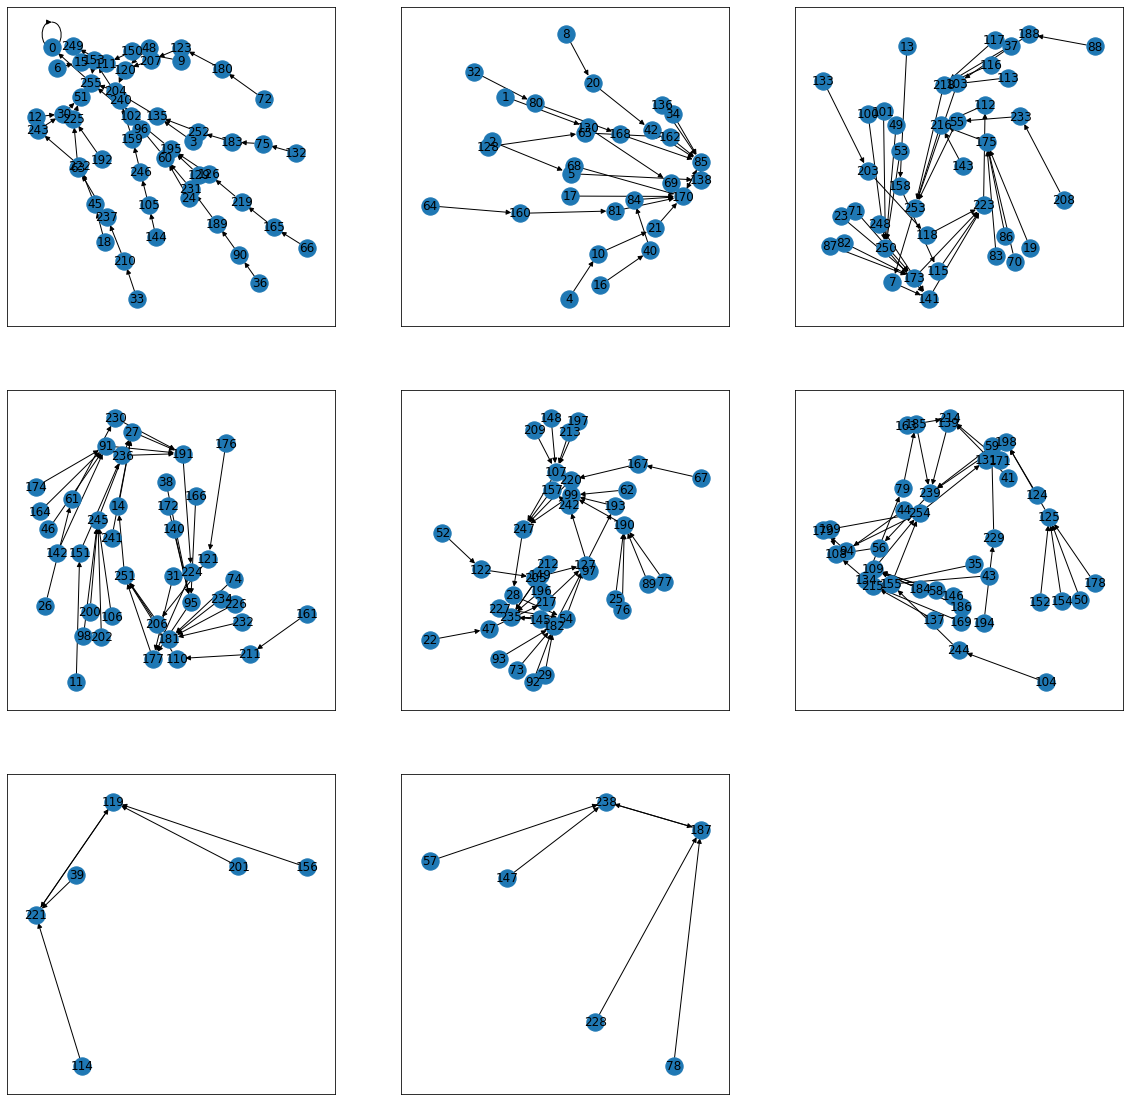

In [22]:
# Plot each connected component of the phase space separately
ccs = [cc for cc in nx.connected_components(g.to_undirected())]
n = len(ccs)
print(n)
w = math.ceil(math.sqrt(n))
h = math.ceil(n / w)

#plt.figure(1, figsize = (12,12))
plt.figure(1, figsize = (20,20))
for i in range(n):
    plt.subplot(h, w, i + 1)
    nx.draw_networkx(nx.subgraph(g, ccs[i]), with_labels = True)

plt.show()
# Suplots are sometimes too packed, so also useful to just draw a few individually
#nx.draw_networkx(nx.subgraph(g, ccs[1]), with_labels = True)


In [23]:
print("Undirected graph diameter: ", max([nx.diameter(nx.subgraph(g, ccs[j]).to_undirected()) for j in range(n)])   )

print("Largest directed shortest path:", max([max(j.values()) for (i,j) in nx.shortest_path_length(g)]) )

Undirected graph diameter:  12
Largest directed shortest path: 8


In [24]:
#find the periods of oscillations for each non fully-convergent system 
ccs = [cc for cc in nx.connected_components(g.to_undirected())]
n = len(ccs)
print(f"Number of connected components: {n}")

w = math.ceil(math.sqrt(n))
h = math.ceil(n / w)

for i in range(n):
    subgraph = nx.subgraph(g, ccs[i])
    attractors = list(nx.simple_cycles(subgraph))  # Find cycles (attractors)

    # Print attractor information
    if attractors:
        for cycle in attractors:
            if len(cycle) == 1:
                node = cycle[0]
                print(f"Final node converged to is {node} (config: {int2config(node)})")
            else:
                period = len(cycle)
                cycle_nodes = cycle
                cycle_configs = [int2config(state) for state in cycle_nodes]
                print(f"Node oscillates between: {cycle_nodes} (configs: {cycle_configs}), Period length: {period}")



Number of connected components: 8
Final node converged to is 0 (config: [0, 0, 0, 0, 0, 0, 0, 0])
Node oscillates between: [170, 85] (configs: [[1, 0, 1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 1, 0, 1]]), Period length: 2
Node oscillates between: [7, 141, 223, 112, 216, 253] (configs: [[0, 0, 0, 0, 0, 1, 1, 1], [1, 0, 0, 0, 1, 1, 0, 1], [1, 1, 0, 1, 1, 1, 1, 1], [0, 1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 1]]), Period length: 6
Node oscillates between: [224, 177, 251, 14, 27, 191] (configs: [[1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0, 1], [1, 1, 1, 1, 1, 0, 1, 1], [0, 0, 0, 0, 1, 1, 1, 0], [0, 0, 0, 1, 1, 0, 1, 1], [1, 0, 1, 1, 1, 1, 1, 1]]), Period length: 6
Node oscillates between: [193, 99, 247, 28, 54, 127] (configs: [[1, 1, 0, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 0, 1, 1], [1, 1, 1, 1, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1, 0, 0], [0, 0, 1, 1, 0, 1, 1, 0], [0, 1, 1, 1, 1, 1, 1, 1]]), Period length: 6
Node oscillates between: [131, 198, 239, 56, 108, 254] (configs: [

In [25]:
# Find strongly connected components (SCCs) in the graph
sccs = list(nx.strongly_connected_components(g))

# Filter SCCs that contain cycles (attractive subcomponents)
attractive_subcomponents = [scc for scc in sccs if any(nx.simple_cycles(nx.subgraph(g, scc)))]

print("Attractive Subcomponents:")
for i, scc in enumerate(attractive_subcomponents):
    print(f"Subcomponent {i + 1}: {sorted(scc)}")


Attractive Subcomponents:
Subcomponent 1: [0]
Subcomponent 2: [85, 170]
Subcomponent 3: [7, 112, 141, 216, 223, 253]
Subcomponent 4: [14, 27, 177, 191, 224, 251]
Subcomponent 5: [28, 54, 99, 127, 193, 247]
Subcomponent 6: [56, 108, 131, 198, 239, 254]
Subcomponent 7: [119, 221]
Subcomponent 8: [187, 238]


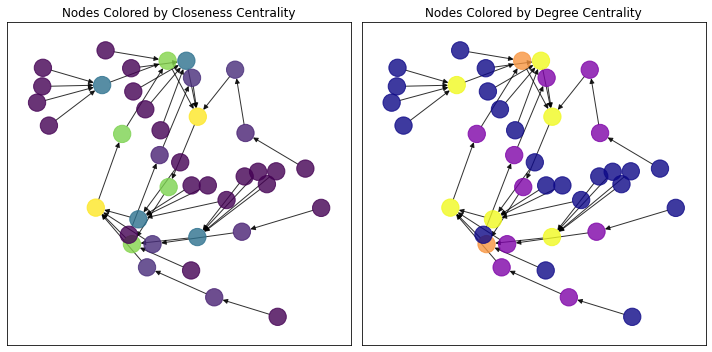

In [59]:
subg = nx.subgraph(g, ccs[4])

attr = set().union(*nx.attracting_components(subg))
pos = nx.spring_layout(subg)

closeness = nx.closeness_centrality(subg)
degree_centrality = nx.degree_centrality(subg)

node_color_closeness = [closeness[n] for n in subg.nodes()]
node_color_degree = [degree_centrality[n] for n in subg.nodes()]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_title("Nodes Colored by Closeness Centrality")
nx.draw_networkx_nodes(subg, pos, ax=axes[0], node_color=node_color_closeness, cmap=plt.cm.viridis, node_size=300, alpha=0.8)
nx.draw_networkx_edges(subg, pos, ax=axes[0], width=1.0, alpha=0.8)

axes[1].set_title("Nodes Colored by Degree Centrality")
nx.draw_networkx_nodes(subg, pos, ax=axes[1], node_color=node_color_degree, cmap=plt.cm.plasma, node_size=300, alpha=0.8)
nx.draw_networkx_edges(subg, pos, ax=axes[1], width=1.0, alpha=0.8)

plt.tight_layout()

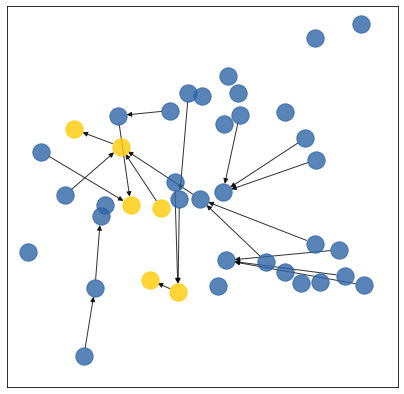

In [56]:
timesteps = 20

for t in range(timesteps):
    evolving_subg = subg.copy()
    if t > 0:
        edges_to_remove = list(evolving_subg.edges())[:t] 
        evolving_subg.remove_edges_from(edges_to_remove)

fig, axes = plt.subplots(1, 1, figsize= (7, 7), sharex=True, sharey=True)

nx.draw_networkx_nodes(evolving_subg, pos, nodelist=set(evolving_subg.nodes()) - attr, node_color='#2F65A7', node_size=300, alpha=0.8)
nx.draw_networkx_nodes(evolving_subg, pos, nodelist=attr, node_color='#FFCB05', node_size=300, alpha=0.8)
nx.draw_networkx_edges(evolving_subg, pos, width=1.0, alpha=0.8)

# Problem 2

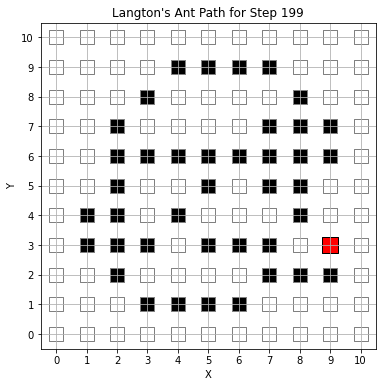

In [3]:
length = 11  
black = 1
white = 0

config = np.zeros([length, length], dtype=int)

position = [length // 2, length // 2] 
direction = np.array([0, 1])  

def rotation_matrix_2d(angle): 
    theta = np.radians(angle)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])

num_steps = 200 

fig, ax = plt.subplots(figsize=(6, 6))
for step in range(num_steps):
    x, y = position
    
    if config[x, y] == white:
        config[x, y] = black  # turn from white to black and rotate to the right
        direction = np.dot(rotation_matrix_2d(90), direction).astype(int) 
    else:
        config[x, y] = white  # turn from black to white and rotate to the left
        direction = np.dot(rotation_matrix_2d(-90), direction).astype(int)  
    
    position[0] = (position[0] + direction[0]) % length
    position[1] = (position[1] + direction[1]) % length

    clear_output(wait=True)
    
    ax.clear()
    ax.set_xlim(-0.5, length - 0.5)
    ax.set_ylim(-0.5, length - 0.5)
    ax.set_xticks(range(length))
    ax.set_yticks(range(length))
    ax.grid(True)

    for i in range(length):
        for j in range(length):
            color = 'black' if config[i, j] == black else 'white'
            ax.scatter(i, j, color=color, s=200, marker='s', edgecolors='gray')
            
    ax.scatter(position[0], position[1], color='red', s=250, marker='s', edgecolors='black')
    ax.set_title(f"Langton's Ant Path for Step {step}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    display(fig)
    time.sleep(0.025)  

plt.close() 

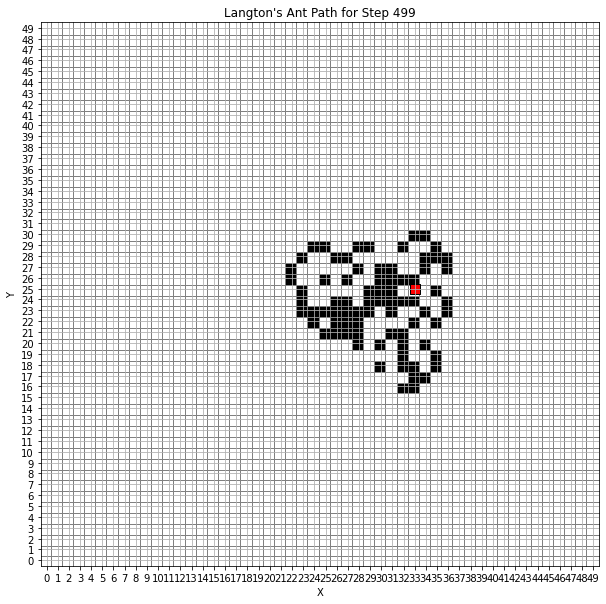

In [6]:
length = 50
black = 1
white = 0

config = np.zeros([length, length], dtype=int)

position = [length // 2, length // 2] 

config[25,25], config[24,25], config[26,25], config[25,24], config[25,26] = 1, 1, 1, 1, 1

direction = np.array([0, 1])  
num_steps = 500

fig, ax = plt.subplots(figsize=(10, 10))
for step in range(num_steps):
    x, y = position
    
    if config[x, y] == white:
        config[x, y] = black  # turn from white to black and rotate to the right
        direction = np.dot(rotation_matrix_2d(90), direction).astype(int) 
    else:
        config[x, y] = white  # turn from black to white and rotate to the left
        direction = np.dot(rotation_matrix_2d(-90), direction).astype(int)  
    
    position[0] = (position[0] + direction[0]) % length
    position[1] = (position[1] + direction[1]) % length

    clear_output(wait=True)
    
    ax.clear()
    ax.set_xlim(-0.5, length - 0.5)
    ax.set_ylim(-0.5, length - 0.5)
    ax.set_xticks(range(length))
    ax.set_yticks(range(length))
    ax.grid(True)

    for i in range(length):
        for j in range(length):
            color = 'black' if config[i, j] == black else 'white'
            ax.scatter(i, j, color=color, s=200, marker='s', edgecolors='gray')
            
    ax.scatter(position[0], position[1], color='red', s=100, marker='s', edgecolors='black')
    ax.set_title(f"Langton's Ant Path for Step {step}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    display(fig)
    time.sleep(0.025)  

plt.close() 

# Problem 3

In [61]:
g2 = nx.read_gml('polbooks.gml')

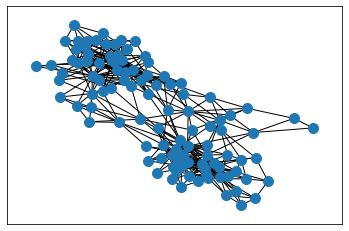

In [63]:
pos=nx.spring_layout(g2) # positions for all nodes
nx.draw_networkx(g2, pos, with_labels = False, node_size = 100) # draw network
plt.show()

Text(0.5, 1.0, 'Degree Distribution (Log-Log)')

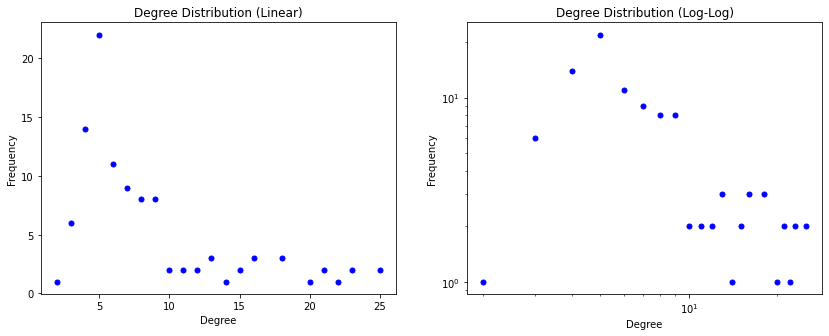

In [64]:
deg_seq = [d for n, d in g2.degree()]
unique_degrees, counts = np.unique(deg_seq, return_counts=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(unique_degrees, counts, 'bo', markersize=5)
axes[0].set_xlabel("Degree")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Degree Distribution (Linear)")


axes[1].loglog(unique_degrees, counts, 'bo', markersize=5)
axes[1].set_xlabel("Degree")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Degree Distribution (Log-Log)")

Text(0.5, 1.0, 'Political Book Betweenness Centrality Plot')

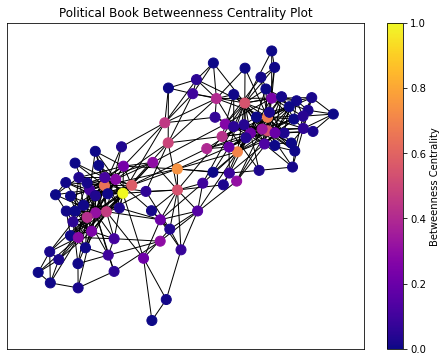

In [66]:
#part b -> redrawing network

centrality, cent_vals = nx.betweenness_centrality(g2), list(centrality.values())

pos = nx.spring_layout(g2)  
plt.figure(figsize=(8, 6))
nx.draw_networkx(g2, pos, with_labels=False, node_size=100, node_color=cent_vals, cmap=plt.cm.plasma)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma), label="Betweenness Centrality")
plt.title("Political Book Betweenness Centrality Plot")

In [82]:
categories = {'n': [], 'l': [], 'c': []}  
colors = {'n': 'gray', 'l': 'blue', 'c': 'red'}#to color the nodes correctly

for node, data in g2.nodes(data=True):
    value = data.get('value', None)  
    if value in categories:
        categories[value].append(node) 
        
new_nodes = [colors[data['value']] for _, data in g2.nodes(data=True)]


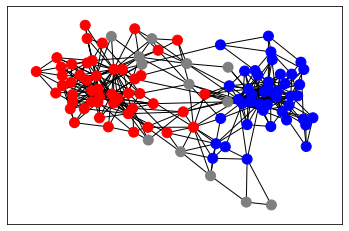

In [87]:
pos=nx.spring_layout(g2) # positions for all nodes
nx.draw_networkx(g2, pos, with_labels = False, node_size = 100, node_color = new_nodes) # draw network

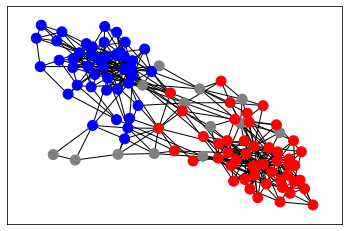

In [96]:
comm_structure = list(nx.algorithms.community.greedy_modularity_communities(g2))

colors = [plt.cm.rainbow(i / len(comm_structure)) for i in range(len(comm_structure))]


node_color_map = {}
for community_index, community in enumerate(comm_structure):
    for node in community:
        node_color_map[node] = colors[community_index]

pos = nx.spring_layout(g2)
nx.draw_networkx(g2, pos, with_labels = False, node_size = 100, node_color = new_nodes) # draw network

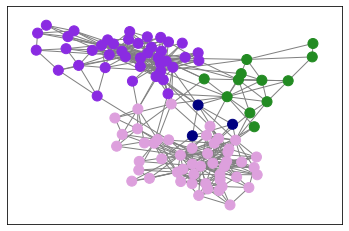

In [102]:
comm_structure = list(nx.algorithms.community.greedy_modularity_communities(g2))
colors = ['plum', 'blueviolet', 'forestgreen', 'navy']

node_color_map = {}
for community_index, community in enumerate(comm_structure):
    for node in community:
        node_color_map[node] = colors[community_index]

new_nodes = [node_color_map[node] for node in g2.nodes()]
pos = nx.spring_layout(g2)

nx.draw_networkx(g2, pos, with_labels=False, node_size=100, node_color = new_nodes, edge_color='gray')